# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from OpenWeatherMap import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#URL and query
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = url + "appid=" + api_key + "&q=" + city

# Print the city count to confirm sufficient count
len(cities)

623

In [3]:
print(cities)

['rikitea', 'kahului', 'vaini', 'bluff', 'vicuna', 'ushuaia', 'salihorsk', 'bessonovka', 'katsuura', 'jalu', 'ponta do sol', 'barrow', 'atuona', 'new norfolk', 'kraslava', 'mataura', 'tura', 'progreso', 'albany', 'saskylakh', 'ghanzi', 'aswan', 'presidencia roque saenz pena', 'chambas', 'arraial do cabo', 'auki', 'kamenka', 'busselton', 'jamestown', 'mahebourg', 'port elizabeth', 'luderitz', 'vardo', 'porbandar', 'chuy', 'omsukchan', 'bowen', 'castro', 'jimenez', 'pangai', 'kapaa', 'khon buri', 'bambanglipuro', 'nikolskoye', 'khatanga', 'cherskiy', 'tiksi', 'saldanha', 'hobart', 'mayumba', 'punta arenas', 'semey', 'provideniya', 'mogok', 'maniitsoq', 'zaysan', 'puerto escondido', 'constitucion', 'puerto ayora', 'lagos', 'guadalupe y calvo', 'almaznyy', 'northam', 'praia da vitoria', 'bredasdorp', 'longyearbyen', 'tahta', 'loudeac', 'magaria', 'seymchan', 'hovd', 'mar del plata', 'sitka', 'dongargaon', 'sao filipe', 'dergachi', 'iquique', 'bengkulu', 'najran', 'kaa-khem', 'georgetown', 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
weatherDF=pd.DataFrame(cities)
weatherDF=weatherDF.rename(columns={0:'City'})
weatherDF.head()

,City
0,rikitea
1,kahului
2,vaini
3,bluff
4,vicuna


In [5]:
weatherDF['Cloudiness']=''
weatherDF['Country']=''
weatherDF['Date']=''
weatherDF['Humidity']=''
weatherDF['Lat']=''
weatherDF['Lng']=''
weatherDF['Max Temp']=''
weatherDF['Wind Speed']=''

In [6]:
print("Beginning Data Retrieval")
print("----------------------------")

count=0
citySet=1
  
for index,row in weatherDF.iterrows():
    city=row['City']
    
    url="http://api.openweathermap.org/data/2.5/weather?"
     
    response=requests.get(url + "appid=" + api_key + "&q=" + city).json()
    
    try:
        print(f"Processing Record {count} of Set {citySet} | {city}")
        #get all table values like clouds first, then dropna below
        clouds=response['clouds']
        weatherDF.loc[index,'Cloudiness']=clouds['all']
        s=response['sys']
        weatherDF.loc[index,'Country']=s['country']
        weatherDF.loc[index,'Date']=response['dt']
        main=response['main']
        weatherDF.loc[index,'Humidity']=main['humidity']
        coord=response['coord']
        weatherDF.loc[index,'Lat']=coord['lat']
        weatherDF.loc[index,'Lng']=coord['lon']
        weatherDF.loc[index,'Max Temp']=main['temp_max']
        wind=response['wind']
        weatherDF.loc[index,'Wind Speed']=wind['speed']
    except (KeyError,IndexError):
        print("City not found. Skipping...")
    count+=1
    if count==50:
        citySet+=1
        count=0

print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 0 of Set 1 | rikitea
Processing Record 1 of Set 1 | kahului
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | vicuna
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | salihorsk
Processing Record 7 of Set 1 | bessonovka
Processing Record 8 of Set 1 | katsuura
Processing Record 9 of Set 1 | jalu
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | kraslava
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | tura
Processing Record 17 of Set 1 | progreso
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | ghanzi
Processing Record 21 of Set 1 | aswan
Processing Record 22 of Set 1 | presidencia ro

Processing Record 39 of Set 4 | skjervoy
Processing Record 40 of Set 4 | innisfail
Processing Record 41 of Set 4 | emerald
Processing Record 42 of Set 4 | jiwani
Processing Record 43 of Set 4 | sonderso
Processing Record 44 of Set 4 | baykit
Processing Record 45 of Set 4 | korla
City not found. Skipping...
Processing Record 46 of Set 4 | lagoa
Processing Record 47 of Set 4 | srandakan
Processing Record 48 of Set 4 | maldonado
Processing Record 49 of Set 4 | lebu
Processing Record 0 of Set 5 | quelimane
Processing Record 1 of Set 5 | ust-omchug
Processing Record 2 of Set 5 | portland
Processing Record 3 of Set 5 | ternate
Processing Record 4 of Set 5 | wahiawa
Processing Record 5 of Set 5 | chitral
Processing Record 6 of Set 5 | olafsvik
City not found. Skipping...
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | rundu
Processing Record 9 of Set 5 | sur
Processing Record 10 of Set 5 | normandin
Processing Record 11 of Set 5 | eyl
Processing Record 12 of Set 5 | opuwo


Processing Record 22 of Set 8 | kavieng
Processing Record 23 of Set 8 | bandar-e lengeh
Processing Record 24 of Set 8 | qaqortoq
Processing Record 25 of Set 8 | codrington
Processing Record 26 of Set 8 | san policarpo
Processing Record 27 of Set 8 | comodoro rivadavia
Processing Record 28 of Set 8 | cedar city
Processing Record 29 of Set 8 | kitui
Processing Record 30 of Set 8 | fonte boa
Processing Record 31 of Set 8 | mahibadhoo
Processing Record 32 of Set 8 | erzin
Processing Record 33 of Set 8 | mogzon
Processing Record 34 of Set 8 | qostanay
Processing Record 35 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 36 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 37 of Set 8 | ugoofaaru
Processing Record 38 of Set 8 | sao lourenco do sul
Processing Record 39 of Set 8 | malpe
Processing Record 40 of Set 8 | mariental
Processing Record 41 of Set 8 | tomatlan
Processing Record 42 of Set 8 | kamaishi
Processing Record 43 of Set 8 | ishigaki
Proc

Processing Record 6 of Set 12 | barra patuca
Processing Record 7 of Set 12 | mildura
Processing Record 8 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 9 of Set 12 | gorom-gorom
Processing Record 10 of Set 12 | qena
Processing Record 11 of Set 12 | lolua
City not found. Skipping...
Processing Record 12 of Set 12 | tiarei
Processing Record 13 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 14 of Set 12 | watsa
Processing Record 15 of Set 12 | malwan
City not found. Skipping...
Processing Record 16 of Set 12 | muravlenko
Processing Record 17 of Set 12 | nizhneangarsk
Processing Record 18 of Set 12 | bereznik
Processing Record 19 of Set 12 | mrirt
City not found. Skipping...
Processing Record 20 of Set 12 | fatezh
Processing Record 21 of Set 12 | moose factory
Processing Record 22 of Set 12 | huarmey
Processing Record 23 of Set 12 | turukhansk
Processing Record 24 of Set 12 | luena
Processing Record 25 of Set 12 | itapeva
Processing Record 26 of Se

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather=requests.get(query_url)
weather=weather.json()
pprint(weather)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -13.71, 'lon': -76.2},
 'dt': 1567646215,
 'id': 3932145,
 'main': {'humidity': 82,
          'pressure': 1014,
          'temp': 289.2,
          'temp_max': 289.26,
          'temp_min': 289.15},
 'name': 'Pisco',
 'sys': {'country': 'PE',
         'id': 8691,
         'message': 0.006,
         'sunrise': 1567595265,
         'sunset': 1567638029,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 210, 'speed': 7.2}}


In [9]:
weatherDF['Cloudiness'].replace('',np.nan,inplace=True)
weatherDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,100.0,PF,1567646181,70,-23.12,-134.97,295.756,3.7
1,kahului,40.0,US,1567646181,52,20.89,-156.47,305.15,11.3
2,vaini,75.0,IN,1567646038,100,15.34,74.49,294.15,3.1
3,bluff,17.0,AU,1567646033,16,-23.58,149.07,299.656,4.61
4,vicuna,NaN,,,,,,,


In [10]:
weatherDF.count()

City          623
Cloudiness    553
Country       623
Date          623
Humidity      623
Lat           623
Lng           623
Max Temp      623
Wind Speed    623
dtype: int64

In [11]:
weatherDF.dropna(subset=['Cloudiness'],inplace=True)
weatherDF.reset_index()
weatherDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,100.0,PF,1567646181,70,-23.12,-134.97,295.756,3.7
1,kahului,40.0,US,1567646181,52,20.89,-156.47,305.15,11.3
2,vaini,75.0,IN,1567646038,100,15.34,74.49,294.15,3.1
3,bluff,17.0,AU,1567646033,16,-23.58,149.07,299.656,4.61
5,ushuaia,75.0,AR,1567646182,56,-54.81,-68.31,279.15,6.2


In [13]:
weatherDF.isna().sum()

City          0
Cloudiness    0
Country       0
Date          0
Humidity      0
Lat           0
Lng           0
Max Temp      0
Wind Speed    0
dtype: int64

In [14]:
weatherDF.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [15]:
weatherDF.to_csv("WeatherPy.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

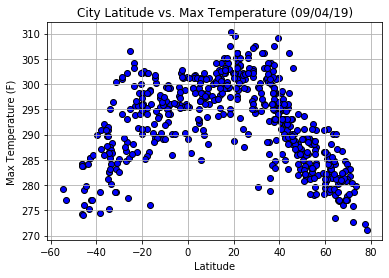

In [27]:
x_axis=weatherDF['Lat']
y_axis=weatherDF['Max Temp']
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(x_axis,
             y_axis,
             marker='o',
             facecolors='blue',
             edgecolors="black"
             )

plt.title('City Latitude vs. Max Temperature (09/04/19)')
plt.grid()
plt.savefig('Max Temp.png')

#### Latitude vs. Humidity Plot

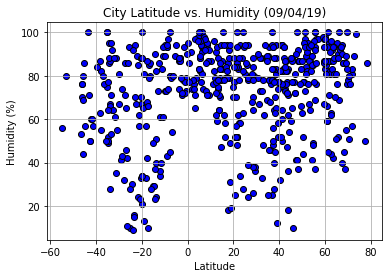

In [28]:
x_axis=weatherDF['Lat']
y_axis=weatherDF['Humidity']
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(x_axis,
             y_axis,
             marker='o',
             facecolors='blue',
             edgecolors="black"
             )

plt.title('City Latitude vs. Humidity (09/04/19)')
plt.grid()
plt.savefig('Humidity.png')

#### Latitude vs. Cloudiness Plot

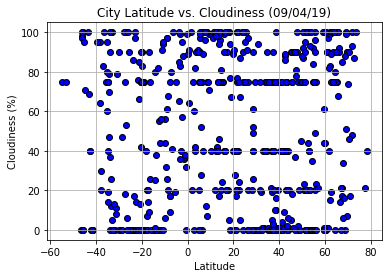

In [29]:
x_axis=weatherDF['Lat']
y_axis=weatherDF['Cloudiness']
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(x_axis,
             y_axis,
             marker='o',
             facecolors='blue',
             edgecolors="black"
             )

plt.title('City Latitude vs. Cloudiness (09/04/19)')
plt.grid()
plt.savefig('Cloudiness.png')

#### Latitude vs. Wind Speed Plot

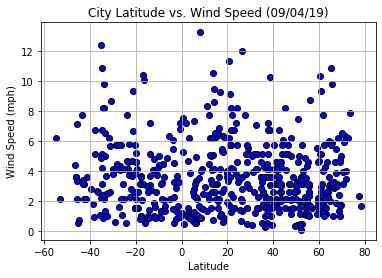

In [30]:
x_axis=weatherDF['Lat']
y_axis=weatherDF['Wind Speed']
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(x_axis,
             y_axis,
             marker='o',
             facecolors='blue',
             edgecolors="black"
             )

plt.title('City Latitude vs. Wind Speed (09/04/19)')
plt.grid()
plt.savefig('Wind Speed.png')

Observables

Higher temperatures are found closer to the equator.

Latitude position appears to not affect the humidity levels.

Cloudiness is spread out relatively eavenly across the globe.